In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df=pd.read_csv('Fraud.csv')

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df.isnull().values.sum()

0

In [8]:
df.shape

(6362620, 11)

In [9]:
print('All unique data count'.upper(),'\n')

for i in df.columns:
    print(f'{i} : {len(df[i].unique())}\n')

ALL UNIQUE DATA COUNT 

step : 743

type : 5

amount : 5316900

nameOrig : 6353307

oldbalanceOrg : 1845844

newbalanceOrig : 2682586

nameDest : 2722362

oldbalanceDest : 3614697

newbalanceDest : 3555499

isFraud : 2

isFlaggedFraud : 2



## **2. Exploratory Data Analysis**

until this section we wrangle with the data exclusively using **DataFrame methods**.  
This is the most succinct way to gain insights into the dataset.  
More elaborate **visualizations** follow in subsequent sections.


 ## 2.1 Fraud Class Imbalance Visualization

In [10]:
## Check all isFraud values are 0 or 1

df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

Fraud percentage: 0.1291%


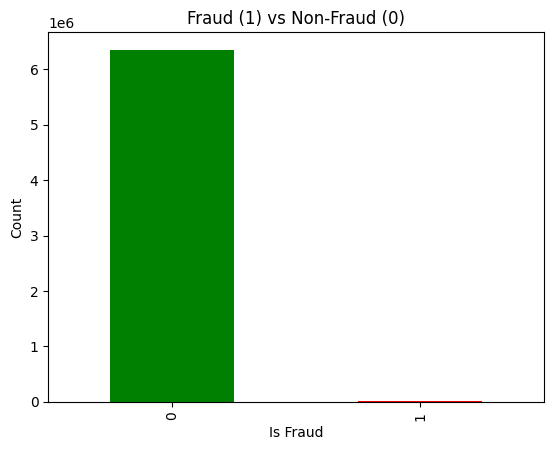

In [11]:

# Percentage
fraud_ratio = df['isFraud'].mean() * 100
print(f"Fraud percentage: {fraud_ratio:.4f}%")



# Bar chart for fraud vs non-fraud
df['isFraud'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Fraud (1) vs Non-Fraud (0)")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()


In [12]:
# Get all rows where both fraud and flagged fraud are 1
flagged_fraud_df = df[(df['isFraud'] == 1) & (df['isFlaggedFraud'] == 1)]

# Display full rows
print("Fraud transactions that are also flagged as fraud:\n")
print(flagged_fraud_df.count())


Fraud transactions that are also flagged as fraud:

step              16
type              16
amount            16
nameOrig          16
oldbalanceOrg     16
newbalanceOrig    16
nameDest          16
oldbalanceDest    16
newbalanceDest    16
isFraud           16
isFlaggedFraud    16
dtype: int64


## 2.2 Transaction types:

In [13]:
fraud_types = df[df['isFraud'] == 1]['type'].unique()
print("Transaction types where fraud occurred:", fraud_types)


Transaction types where fraud occurred: ['TRANSFER' 'CASH_OUT']


In [58]:
fraud_type_counts = df[df['isFraud'] == 1]['type'].value_counts()
print("Fraud transaction count by type:\n", fraud_type_counts)


Fraud transaction count by type:
 type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64


**NOTE:** From the analysis, we found that fraud only occurs in TRANSFER and CASH_OUT transactions. These types involve transferring funds between users or withdrawing funds — which aligns with how fraudsters typically operate: they steal from one account, transfer funds to another, and immediately withdraw. Other types like PAYMENT, CASH_IN, and DEBIT showed zero fraud, confirming they're safer transaction types.

C:\Users\sagar rajak\AppData\Local\Temp\ipykernel_31020\1534392502.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='coolwarm')


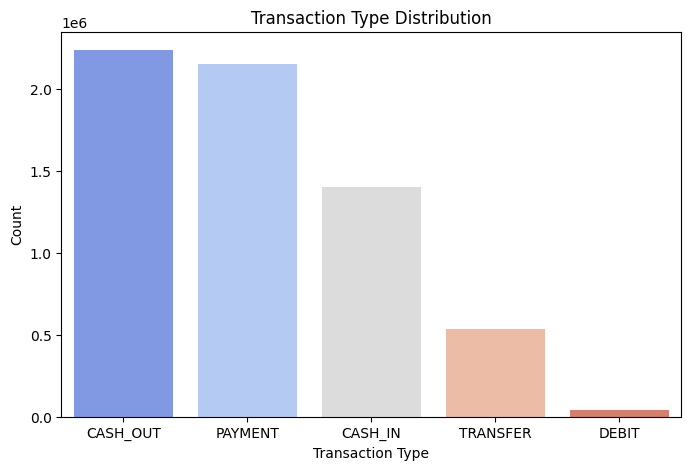

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='coolwarm')
plt.title("Transaction Type Distribution")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()


## 2.2.1 Fraud percentage by Transaction Type:

Fraud percentage by transaction type:
 type
TRANSFER    0.768799
CASH_OUT    0.183955
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


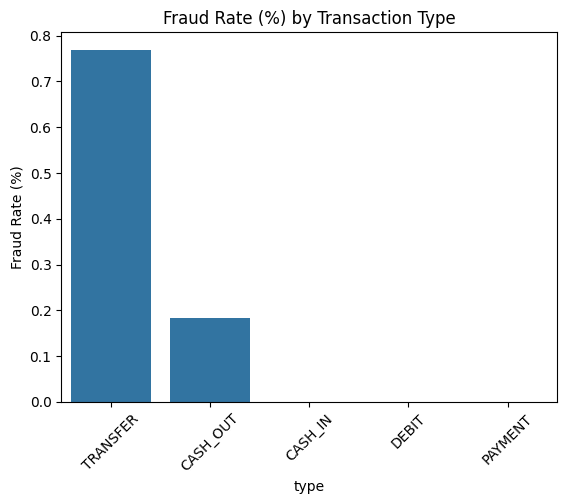

In [15]:
fraud_percent_by_type = df.groupby('type')['isFraud'].mean().sort_values(ascending=False) * 100
print("Fraud percentage by transaction type:\n", fraud_percent_by_type)


sns.barplot(x=fraud_percent_by_type.index, y=fraud_percent_by_type.values)
plt.title("Fraud Rate (%) by Transaction Type")
plt.ylabel("Fraud Rate (%)")
plt.xticks(rotation=45)
plt.show()


Observation: Fraud occurs only in TRANSFER and CASH_OUT transactions.

TRANSFER: ~0.77% of all such transactions are fraud.

CASH_OUT: ~0.18% of all such transactions are fraud.

PAYMENT, CASH_IN, and DEBIT transactions have zero fraud in the dataset.

Reason:

Fraudsters usually steal funds from one account and either transfer to another or cash it out.

PAYMENT and CASH_IN involve merchants or deposits, so are less likely used for fraud.

## 2.3  **Fraud vs Amount Distribution:**

## 2.3.1 Transaction Amount Distribution by Fraud Status:
   This plot shows that fraudulent transactions tend to occur more frequently at higher amounts compared to non-fraudulent ones. The density of fraud spikes sharply at the high end, suggesting fraudsters attempt to maximize the profit per attack. Non-fraudulent transactions are more normally distributed with a smoother peak at smaller amounts

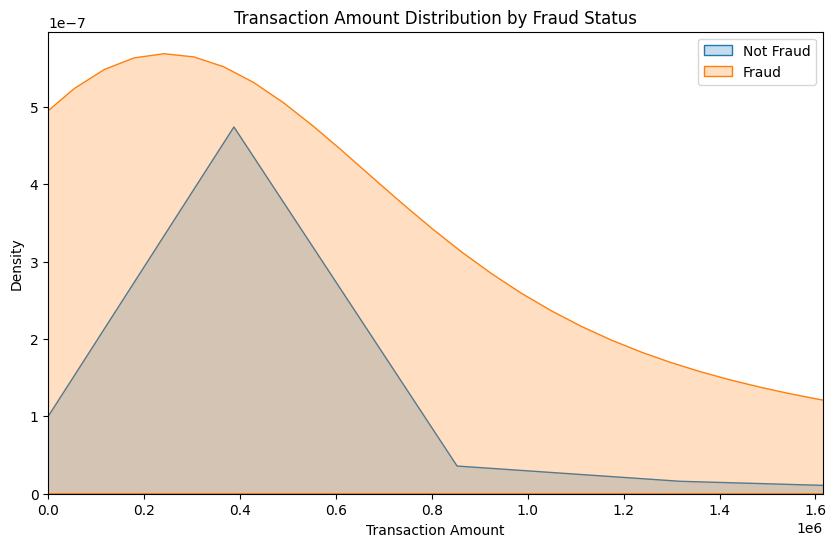

In [16]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df[df['isFraud'] == 0]['amount'], label='Not Fraud', fill=True)
sns.kdeplot(data=df[df['isFraud'] == 1]['amount'], label='Fraud', fill=True)
plt.xlim(0, df['amount'].quantile(0.99))  # remove outliers
plt.title('Transaction Amount Distribution by Fraud Status')
plt.xlabel('Transaction Amount')
plt.legend()
plt.show()


## 2.3.2 Transaction Amount by type:

This plot compares transaction amounts across different types, filtered to exclude extreme outliers. TRANSFER and CASH_OUT transactions show a wider range and higher median amounts — aligning with earlier findings that these types are more associated with fraud. On the other hand, PAYMENT, CASH_IN, and DEBIT transactions tend to have smaller and more tightly clustered amounts.

C:\Users\sagar rajak\AppData\Local\Temp\ipykernel_31020\2023860013.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='amount', data=df[df['amount'] < df['amount'].quantile(0.95)], palette='Set3')


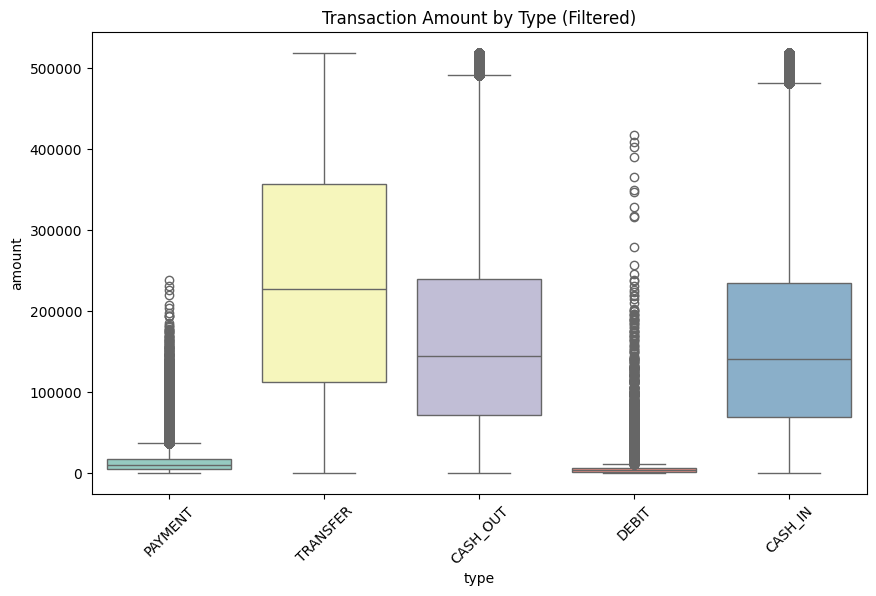

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='amount', data=df[df['amount'] < df['amount'].quantile(0.95)], palette='Set3')
plt.title('Transaction Amount by Type (Filtered)')
plt.xticks(rotation=45)
plt.show()


## 2.3.3  Fraud Distribution by Amount (Filtered to Remove Outliers)

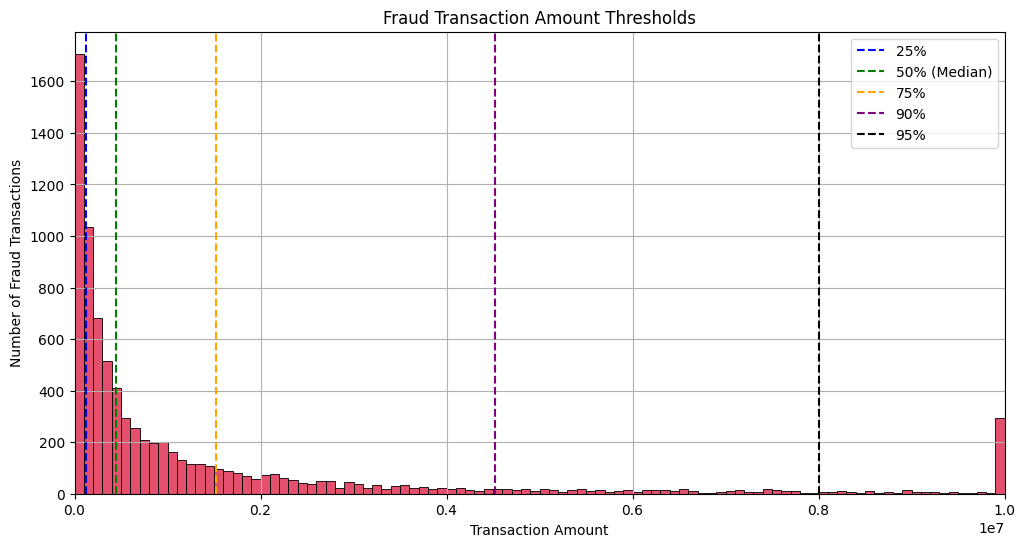

In [18]:

fraud_amounts = df[df['isFraud'] == 1]['amount']

plt.figure(figsize=(12,6))
sns.histplot(fraud_amounts, bins=100, color='crimson')
plt.axvline(fraud_amounts.quantile(0.25), color='blue', linestyle='--', label='25%')
plt.axvline(fraud_amounts.quantile(0.5), color='green', linestyle='--', label='50% (Median)')
plt.axvline(fraud_amounts.quantile(0.75), color='orange', linestyle='--', label='75%')
plt.axvline(fraud_amounts.quantile(0.90), color='purple', linestyle='--', label='90%')
plt.axvline(fraud_amounts.quantile(0.95), color='black', linestyle='--', label='95%')
plt.title("Fraud Transaction Amount Thresholds")
plt.xlabel("Transaction Amount")
plt.ylabel("Number of Fraud Transactions")
plt.legend()
plt.xlim(0, fraud_amounts.quantile(0.99))  # focus on non-extreme outliers
plt.grid(True)
plt.show()

In [19]:
fraud_amounts = df[df['isFraud'] == 1]['amount']

print("Fraud Amount Thresholds:")
print(fraud_amounts.describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.95, 0.99]))


Fraud Amount Thresholds:
count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
90%      4.521724e+06
95%      8.006429e+06
99%      1.000000e+07
max      1.000000e+07
Name: amount, dtype: float64


**NOTE:** Most fraudulent transactions fall in the range of ₹1.2L to ₹15L, with a median of ₹4.4L.
The top 10% of frauds exceed ₹45L, and the top 5% go beyond ₹80L.
This distribution shows that fraudsters often target both mid-range and high-value accounts, likely aiming for quick, large gains.

## 2.4 Time of Day Pattern (step % 24) :

This plot shows time-of-day patterns in fraud activity. Spikes in certain hours may indicate that fraudsters prefer acting during specific periods — often during late-night or early-morning hours when system monitoring is lower. These insights can help security teams strengthen checks during peak fraud hours

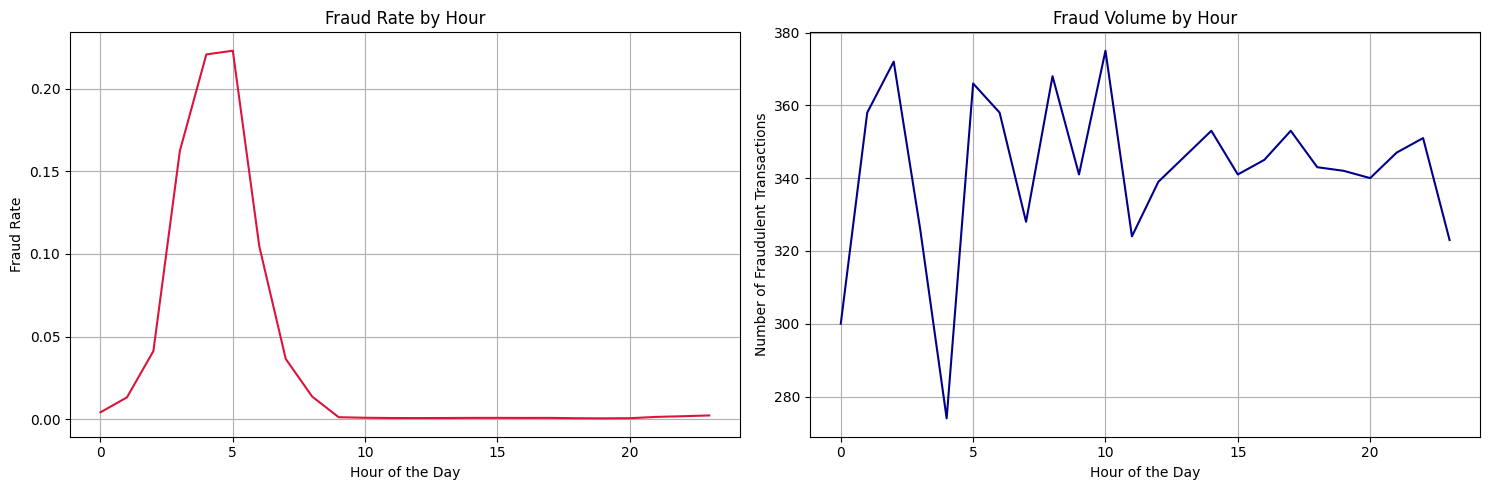

In [20]:
import matplotlib.pyplot as plt

# Create step_hour column from step (each step = 1 hour)
df['step_hour'] = df['step'] % 24


# Step 1: Group by hour for fraud and total transactions
fraud_volume_by_hour = df[df['isFraud'] == 1].groupby('step_hour').size()
total_volume_by_hour = df.groupby('step_hour').size()
fraud_by_hour = fraud_volume_by_hour / total_volume_by_hour  # if not already computed

# Step 2: Plotting both fraud rate and fraud volume
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Fraud rate by hour (ratio of frauds to all transactions)
ax1.plot(fraud_by_hour.index, fraud_by_hour.values, color='crimson')
ax1.set_title("Fraud Rate by Hour")
ax1.set_xlabel("Hour of the Day")
ax1.set_ylabel("Fraud Rate")
ax1.grid(True)

# Plot 2: Total fraud cases by hour (volume)
ax2.plot(fraud_volume_by_hour.index, fraud_volume_by_hour.values, color='darkblue')
ax2.set_title("Fraud Volume by Hour")
ax2.set_xlabel("Hour of the Day")
ax2.set_ylabel("Number of Fraudulent Transactions")
ax2.grid(True)

plt.tight_layout()
plt.show()


Key takeaway: Early morning has the highest fraud rate but may not have the highest fraud volume. For risk management decisions, you'd want to consider both metrics - the rate helps identify suspicious time windows, while volume shows where you're losing the most money.

## 2.4.1 Fraud Cases Across Time Steps (Entire Timeline):

This plot shows the distribution of fraudulent activities over the entire simulation. Peaks indicate periods of fraud spikes, which might be due to targeted attacks or simulation behavior where fraudsters test the system at specific intervals. The insight helps monitor when fraud is most active over longer periods.


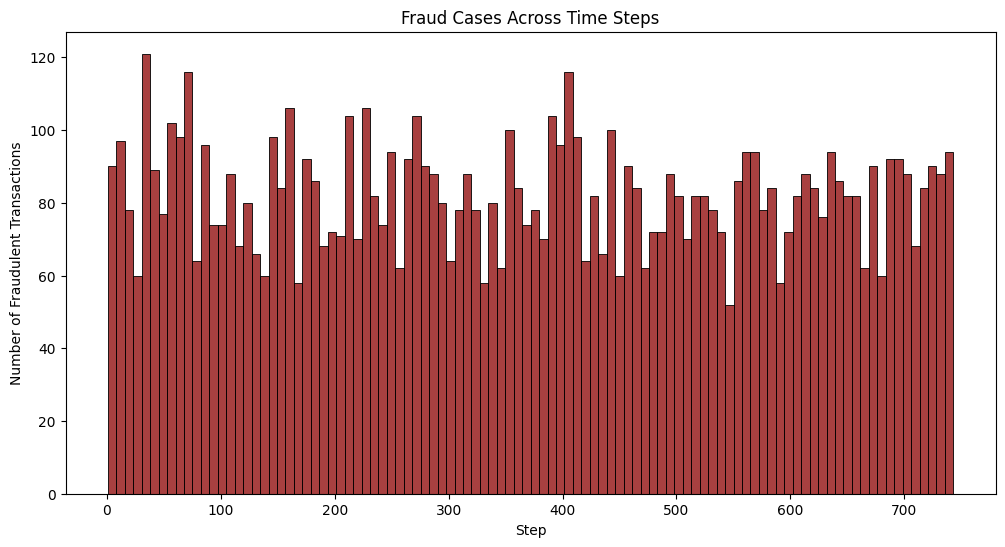

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(data=df[df['isFraud']==1], x='step', bins=100, color='darkred')
plt.title('Fraud Cases Across Time Steps')
plt.xlabel('Step')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

## 2.5 Is Receiver a Merchant? (isMerchant):
Fraudulent transactions almost never occur when the receiver is a merchant. This suggests that fraudsters avoid using merchant accounts and instead use customer accounts (possibly fake or hijacked) to receive stolen funds

isMerchant
0    0.195031
1    0.000000
Name: isFraud, dtype: float64


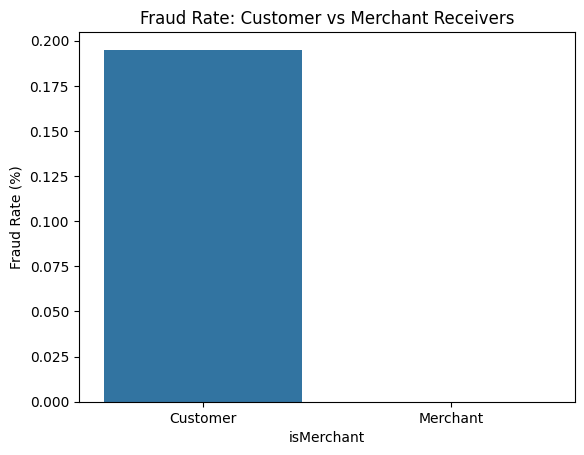

In [22]:
# Create isMerchant column: 1 if nameDest starts with 'M', else 0
df['isMerchant'] = df['nameDest'].str.startswith('M').astype(int)

merchant_fraud_rate = df.groupby('isMerchant')['isFraud'].mean() * 100 

print(merchant_fraud_rate)

sns.barplot(x=merchant_fraud_rate.index, y=merchant_fraud_rate.values)
plt.xticks([0, 1], ['Customer', 'Merchant'])
plt.ylabel("Fraud Rate (%)")
plt.title("Fraud Rate: Customer vs Merchant Receivers")
plt.show()



In [23]:

print('\nAre there any merchants among originator accounts for CASH_IN \
transactions? {}'.format(\
(df.loc[df.type == 'CASH_IN'].nameOrig.str.contains('M')).any())) # False


Are there any merchants among originator accounts for CASH_IN transactions? False


In [24]:
print('\nAre there any merchants among destination accounts for CASH_OUT \
transactions? {}'.format(\
(df.loc[df.type == 'CASH_OUT'].nameDest.str.contains('M')).any())) # False


Are there any merchants among destination accounts for CASH_OUT transactions? False


In [25]:
print('\nAre there merchants among any originator accounts? {}'.format(\
      df.nameOrig.str.contains('M').any())) # False

print('\nAre there any transactions having merchants among destination accounts\
 other than the PAYMENT type? {}'.format(\
(df.loc[df.nameDest.str.contains('M')].type != 'PAYMENT').any())) # False


Are there merchants among any originator accounts? False

Are there any transactions having merchants among destination accounts other than the PAYMENT type? False


*Conclusion*: Among the account labels *nameOrig* and *nameDest*, for all transactions, the merchant prefix of 'M' occurs in an unexpected way.

## 2.6 Fraud Rate When Sender Empties Account (isEmptied):

In [26]:
df['isEmptied'] = (df['newbalanceOrig'] == 0) & (df['oldbalanceOrg'] > 0)

print(df.groupby('isFraud')['isEmptied'].mean() * 100)


isFraud
0    23.803464
1    97.552660
Name: isEmptied, dtype: float64


In [27]:
df['emptyReceiver'] = (df['oldbalanceDest'] == 0) & (df['newbalanceDest'] > 0)

print(df.groupby('isFraud')['emptyReceiver'].mean() * 100)


isFraud
0     6.071865
1    15.524169
Name: emptyReceiver, dtype: float64


C:\Users\sagar rajak\AppData\Local\Temp\ipykernel_31020\1132681680.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emptied_fraud_rate.index, y=emptied_fraud_rate.values, palette="Set2")


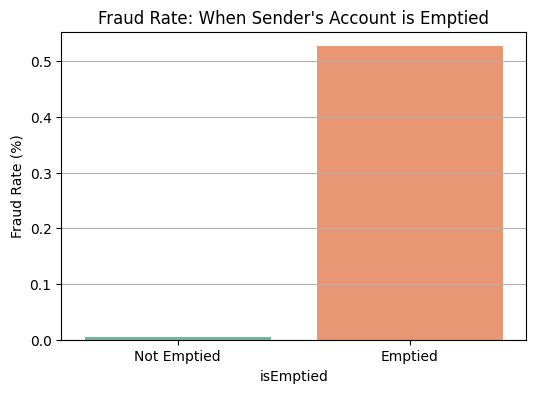

In [28]:

# Fraud rate when account is emptied vs not
emptied_fraud_rate = df.groupby('isEmptied')['isFraud'].mean() * 100

plt.figure(figsize=(6,4))
sns.barplot(x=emptied_fraud_rate.index, y=emptied_fraud_rate.values, palette="Set2")
plt.xticks([0,1], ['Not Emptied', 'Emptied'])
plt.ylabel("Fraud Rate (%)")
plt.title("Fraud Rate: When Sender's Account is Emptied")
plt.grid(True, axis='y')
plt.show()

**NOTE:** Fraudulent transactions are far more likely to result in the sender’s account being completely emptied.
This supports the behavior pattern of fraudsters — once they gain access to an account, they attempt to transfer out all available funds in a single transaction to avoid detection and prevent recovery

## 2.7 Fraud Rate When Receiver Had 0 Balance (emptyReceiver):

C:\Users\sagar rajak\AppData\Local\Temp\ipykernel_31020\1866425044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=empty_recv_fraud_rate.index, y=empty_recv_fraud_rate.values, palette="Set3")


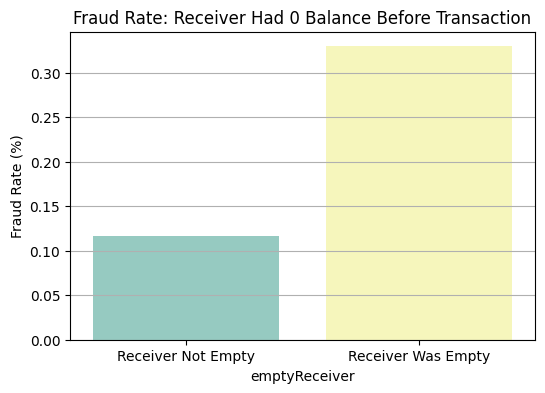

In [29]:
# Fraud rate when receiver started with 0 balance vs not
empty_recv_fraud_rate = df.groupby('emptyReceiver')['isFraud'].mean() * 100

plt.figure(figsize=(6,4))
sns.barplot(x=empty_recv_fraud_rate.index, y=empty_recv_fraud_rate.values, palette="Set3")
plt.xticks([0,1], ['Receiver Not Empty', 'Receiver Was Empty'])
plt.ylabel("Fraud Rate (%)")
plt.title("Fraud Rate: Receiver Had 0 Balance Before Transaction")
plt.grid(True, axis='y')
plt.show()


**NOTE:** Fraudulent transactions disproportionately go to receivers with zero starting balance.
This pattern indicates that fraudsters may use fresh or fake accounts to collect stolen funds. These accounts are likely created specifically for fraud, often with no prior balance history

## 2.8 What is isFlaggedFraud supposed to mean?

An illegal attempt in this dataset is an attempt to TRANSFER more than 200,000 in a single transaction. These should be flagged as fraud (isFlaggedFraud=1)


##### 2.8 What determines whether the feature *isFlaggedFraud* gets set or not? 
It turns out that the origin of *isFlaggedFraud* is unclear, contrasting
with the description provided.
The 16 entries (out of 6 million) where the *isFlaggedFraud* feature 
is set 
do not seem to correlate with any
explanatory variable. The data is described as *isFlaggedFraud* being set when
an attempt is made to 'TRANSFER' an 'amount' greater than 200,000. 
In
fact, as shown below, *isFlaggedFraud* can remain not set despite this condition being met.

In [30]:
print('\nThe type of transactions in which isFlaggedFraud is set: \
{}'.format(list(df.loc[df.isFlaggedFraud == 1].type.drop_duplicates()))) 
                                                            # only 'TRANSFER'

dfTransfer = df.loc[df.type == 'TRANSFER']
dfFlagged = df.loc[df.isFlaggedFraud == 1]
dfNotFlagged = df.loc[df.isFlaggedFraud == 0]

print('\nMin amount transacted when isFlaggedFraud is set= {}'\
                                  .format(dfFlagged.amount.min())) # 353874.22

print('\nMax amount transacted in a TRANSFER where isFlaggedFraud is not set=\
 {}'.format(dfTransfer.loc[dfTransfer.isFlaggedFraud == 0].amount.max())) # 92445516.64


The type of transactions in which isFlaggedFraud is set: ['TRANSFER']

Min amount transacted when isFlaggedFraud is set= 353874.22

Max amount transacted in a TRANSFER where isFlaggedFraud is not set= 92445516.64


**NOTE:** According to the dataset description, it should flag TRANSFER transactions with amount > 200,000.

However, you found:

Only 16 total flagged transactions across 6.3 million records.

Many high-value transfers (₹9+ crore) were not flagged.

So, the flag does not reflect the rule consistently

While isFlaggedFraud = 1 always occurs in TRANSFER transactions where both oldBalanceDest and newBalanceDest are 0 (indicating the transaction may have been blocked), this condition is not sufficient to determine flagging.
There are thousands of similar transactions where the destination balances are also 0 — but the flag is not set.

This proves that isFlaggedFraud is not logically derived from these balance values.
It's either manually assigned, or governed by inconsistent or incomplete rules.

In [31]:
print('\nThe number of TRANSFERs where isFlaggedFraud = 0, yet oldBalanceDest = 0 and \
newBalanceDest = 0: {}'.format(
    len(dfTransfer.loc[
        (dfTransfer['isFlaggedFraud'] == 0) & 
        (dfTransfer['oldbalanceDest'] == 0) & 
        (dfTransfer['newbalanceDest'] == 0)
    ])
))



The number of TRANSFERs where isFlaggedFraud = 0, yet oldBalanceDest = 0 and newBalanceDest = 0: 4158


4158 transactions meet this condition but were NOT flagged.

❌ This means:

Having oldBalanceDest == 0 and newBalanceDest == 0 does not guarantee that the transaction is flagged.

So these balance values do not determine isFlaggedFraud.



You cannot depend on oldBalanceDest and newBalanceDest to determine isFlaggedFraud.
So:

Don't use these features to predict it.

Drop isFlaggedFraud from your model pipeline.

Focus on modeling isFraud using true behavioral patterns.

## **3.Data Preprocessing:**

## cleaning up the data:

In [32]:
# Keep only transactions where fraud actually occurs
df_model = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])].copy()



In [33]:
# Replace zero destination balances with -1 to indicate 'unknown'
df_model['oldbalanceDest'] = df_model['oldbalanceDest'].replace(0, -1)
df_model['newbalanceDest'] = df_model['newbalanceDest'].replace(0, -1)


In [34]:
import numpy as np

# Replace zero origin balances with NaN
df_model['oldbalanceOrg'] = df_model['oldbalanceOrg'].replace(0, np.nan)
df_model['newbalanceOrig'] = df_model['newbalanceOrig'].replace(0, np.nan)




In [35]:
print("Destination balance entries set to -1:")
print((df_model['oldbalanceDest'] == -1).sum(), "(old)")
print((df_model['newbalanceDest'] == -1).sum(), "(new)")

print("\nOrigin balance entries set to NaN:")
print(df_model['oldbalanceOrg'].isna().sum(), "(old)")
print(df_model['newbalanceOrig'].isna().sum(), "(new)")


Destination balance entries set to -1:
389320 (old)
16599 (new)

Origin balance entries set to NaN:
1308582 (old)
2496656 (new)


In [36]:
# Simple median imputation for origin NaNs (optional)
df_model['oldbalanceOrg'].fillna(df_model['oldbalanceOrg'].median(), inplace=True)
df_model['newbalanceOrig'].fillna(df_model['newbalanceOrig'].median(), inplace=True)


In [37]:
df_model.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,step_hour,isMerchant,isEmptied,emptyReceiver
2,1,TRANSFER,181.00,C1305486145,181.0,77552.49,C553264065,-1.0,-1.00,1,0,1,0,True,False
3,1,CASH_OUT,181.00,C840083671,181.0,77552.49,C38997010,21182.0,-1.00,1,0,1,0,True,False
15,1,CASH_OUT,229133.94,C905080434,15325.0,77552.49,C476402209,5083.0,51513.44,0,0,1,0,True,False
19,1,TRANSFER,215310.30,C1670993182,705.0,77552.49,C1100439041,22425.0,-1.00,0,0,1,0,True,False
24,1,TRANSFER,311685.89,C1984094095,10835.0,77552.49,C932583850,6267.0,2719172.89,0,0,1,0,True,False


 Data Cleaning – Summary (Why & What We Did)
Filtered only TRANSFER and CASH_OUT transactions where fraud actually occurs.

Replaced zero destination balances with -1 to indicate likely missing or uninitialized values.

Replaced zero origin balances with NaN and imputed them using the median to preserve distribution.

Removed records and columns (isFlaggedFraud, nameOrig, nameDest) that don't help in fraud detection.

These steps reduce noise, preserve meaningful signals, and make the dataset consistent for modeling.

## Preprocessing the data:

In [38]:
# Keep only TRANSFER and CASH_OUT transactions
df_model = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])].copy()


# Define target variable
Y = df_model['isFraud']

# Drop target and irrelevant columns from features
X = df_model.drop(['isFraud', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)


What We Ignored — and Why:
nameOrig and nameDest are IDs only, not informative on behavior.

isFlaggedFraud is not reliable (only 16 flagged among 6M rows, despite many qualifying conditions).

In [39]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,step_hour,isMerchant,isEmptied,emptyReceiver
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,0,True,False
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0,True,False
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,1,0,True,False
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,1,0,True,False
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,1,0,True,False


## One-hot encode the 'type' column

In [40]:

X = pd.get_dummies(X, columns=['type'], drop_first=True)

X.head()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,step_hour,isMerchant,isEmptied,emptyReceiver,type_TRANSFER
2,1,181.00,181.0,0.0,0.0,0.00,1,0,True,False,True
3,1,181.00,181.0,0.0,21182.0,0.00,1,0,True,False,False
15,1,229133.94,15325.0,0.0,5083.0,51513.44,1,0,True,False,False
19,1,215310.30,705.0,0.0,22425.0,0.00,1,0,True,False,True
24,1,311685.89,10835.0,0.0,6267.0,2719172.89,1,0,True,False,True


In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2770409 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   step_hour       int64  
 7   isMerchant      int32  
 8   isEmptied       bool   
 9   emptyReceiver   bool   
 10  type_TRANSFER   bool   
dtypes: bool(3), float64(5), int32(1), int64(2)
memory usage: 187.6 MB


## balance error features
This improves the signal for detecting fraudulent behavior.

In [42]:
# Add engineered features
X['errorBalanceOrig'] = X['newbalanceOrig'] + X['amount'] - X['oldbalanceOrg']
X['errorBalanceDest'] = X['oldbalanceDest'] + X['amount'] - X['newbalanceDest']


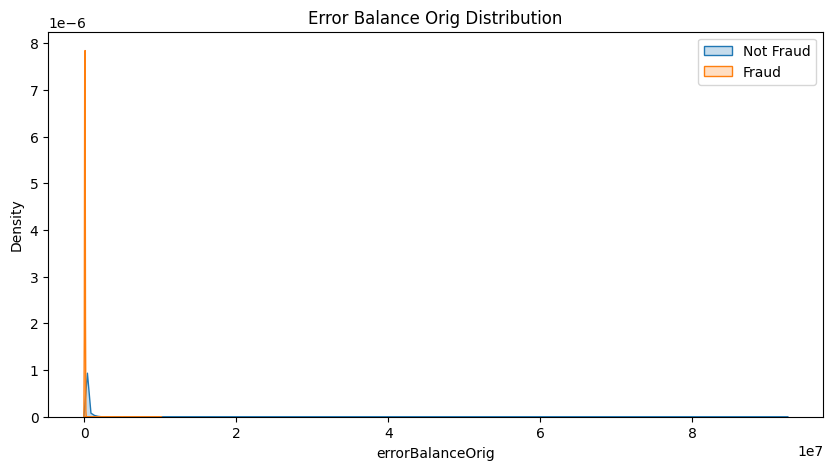

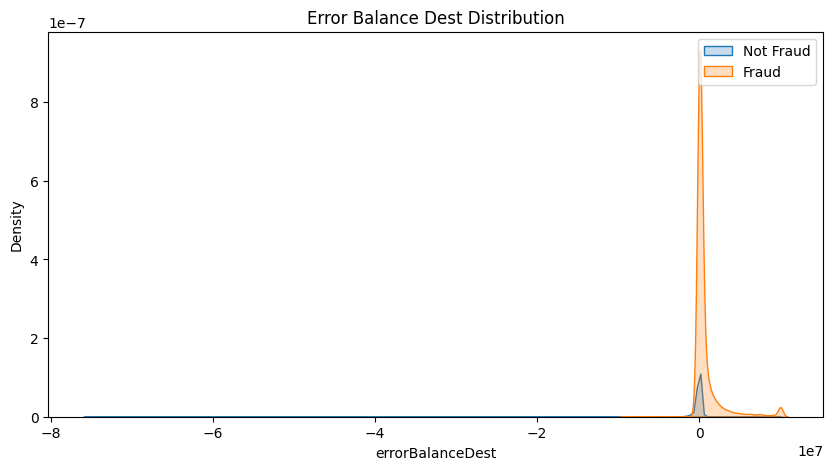

In [43]:
plt.figure(figsize=(10, 5))
sns.kdeplot(X[Y == 0]['errorBalanceOrig'], label='Not Fraud', fill=True)
sns.kdeplot(X[Y == 1]['errorBalanceOrig'], label='Fraud', fill=True)
plt.title('Error Balance Orig Distribution')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
sns.kdeplot(X[Y == 0]['errorBalanceDest'], label='Not Fraud', fill=True)
sns.kdeplot(X[Y == 1]['errorBalanceDest'], label='Fraud', fill=True)
plt.title('Error Balance Dest Distribution')
plt.legend()
plt.show()


1. Selection of  Variables for the Model?
We used a combination of:

🔹 a. Domain Knowledge from EDA
Fraud only occurred in 'TRANSFER' and 'CASH_OUT' transactions.

Features like nameOrig, nameDest, and isFlaggedFraud were found irrelevant or inconsistent — so we dropped them.

🔹 b. Data Quality
Replaced 0 destination balances with -1 (unknown but meaningful).

Replaced 0 origin balances with NaN, then imputed with median — preserving true missing behavior.

🔹 c. Feature Engineering
Created errorBalanceOrig and errorBalanceDest — these show discrepancies in expected balance updates and were found to correlate with fraud.

🔹 d. One-Hot Encoding
Converted type into binary columns (TRANSFER, CASH_OUT) using pd.get_dummies() for model compatibility.

 2. Key Factors That Predict Fraud
Based on EDA, domain logic, and visualizations, the most important predictors of fraud are:

Feature	Why It’s Important
type	Fraud only occurs in TRANSFER and CASH_OUT
amount	High-value transactions are more likely to be fraud
errorBalanceOrig	Irregularity between original balance, transaction, and new balance
errorBalanceDest	Same, but for recipient account
oldbalanceDest	Many frauds had oldbalanceDest = 0 (often newly created target accounts)
newbalanceDest	Sometimes unchanged after receiving funds — suspicious behavior




Fraudsters typically transfer or cash out money quickly.

They often send funds to new or inactive accounts, which have oldbalanceDest = 0.

Fraudulent transactions don’t follow normal banking behavior, so balance errors (errorBalance*) flag this deviation.

Amount is also critical — fraud is more frequent with high values (like > ₹4L, based on quantile analysis).

## **4.Train-test split:**
Split the data into training and test sets in a 80:20 ratio

In [44]:
from sklearn.model_selection import train_test_split

# 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


## **5.Handle class imbalance:**

Having obtained evidence from the plots above that the data now contains 
features that
make fraudulent transactions clearly 
detectable, the remaining obstacle for training a robust ML model is the highly 
imbalanced
nature of the data.

In [45]:
pip install -U scikit-learn imbalanced-learn


  Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


## **6.Train models: RF, XGBoost:**
*Selection of ML algorithm*: A first approach to deal with imbalanced data is to balance it by discarding the majority class before applying an ML algorithm. The disadvantage of  undersampling is that a model trained in this way will not perform well on real-world skewed test data since almost all the information was discarded. A better approach might be to oversample the minority class, say by the synthetic minority oversampling technique (SMOTE) contained in the 'imblearn' library. Motivated by this, I tried a variety of anomaly-detection and supervised learning approaches. I find, however, that the best result is obtained on the original dataset by using a ML algorithm based on ensembles of decision trees that intrinsically performs well on imbalanced data. Such algorithms not only allow for constructing a model that can cope with the missing values in our data, but they naturally allow for speedup via parallel-processing. Among these algorithms, the extreme gradient-boosted (XGBoost) algorithm used below slightly outperforms random-forest. Finally, XGBoost, like several other ML algorithms, allows for weighting the positive class more compared to the negative class --- a setting that also allows to account for the skew in the data.

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)


RandomForestClassifier(random_state=42)

In [58]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_res, y_train_res)


c:\Users\sagar rajak\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:09:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

## **7.Evaluate: classification report, ROC AUC:**
AUROC (Area Under the ROC Curve) plots:

True Positive Rate (TPR) vs False Positive Rate (FPR)

In imbalanced data:

FPR becomes very small, even for a bad model

This inflates AUROC, giving a false sense of performance

A model could predict 99.9% "Not Fraud" and still have a high AUROC, but miss all actual frauds!


**AUPRC is Better Here**
AUPRC (Area Under Precision-Recall Curve) focuses on:

Precision (How many predicted frauds are actually frauds?)

Recall (How many actual frauds did the model catch?)

It tells us:

How good the model is at catching frauds without many false alarms

AUPRC is sensitive to class imbalance, so it doesn't get “tricked” like AUROC

## Evaluation for Random Forest

📌 Random Forest - Confusion Matrix:
[[552428     11]
 [     5   1638]]

📌 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552439
           1       0.99      1.00      1.00      1643

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082

📊 AUROC (ROC AUC Score): 0.9990725656904528
📊 AUPRC (PR AUC Score): 0.9970759587322581


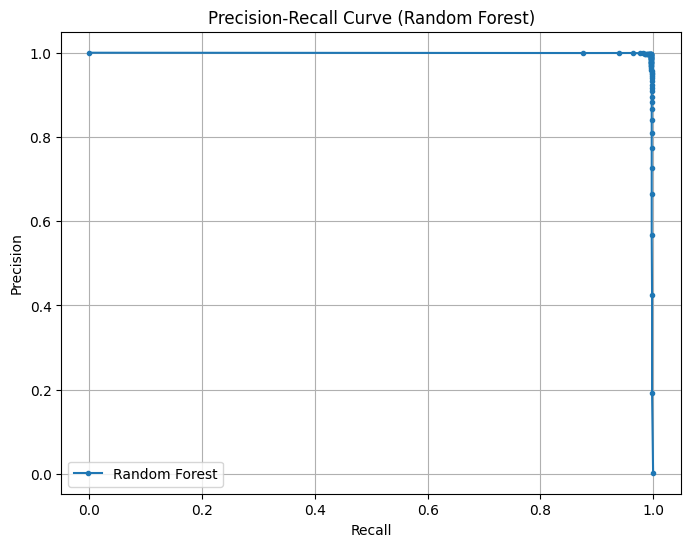

In [59]:
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, average_precision_score,
    precision_recall_curve
)
import matplotlib.pyplot as plt

# Predict
rf_pred = rf.predict(X_test)
rf_prob = rf.predict_proba(X_test)[:, 1]

# Reports
print("📌 Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))

print("\n📌 Classification Report:")
print(classification_report(y_test, rf_pred))

print("📊 AUROC (ROC AUC Score):", roc_auc_score(y_test, rf_prob))
print("📊 AUPRC (PR AUC Score):", average_precision_score(y_test, rf_prob))

# PR Curve
precision, recall, _ = precision_recall_curve(y_test, rf_prob)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.title("Precision-Recall Curve (Random Forest)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()


The Random Forest classifier has achieved near-perfect performance on the imbalanced fraud detection dataset:

It correctly identified 99.7%+ of all fraud cases with very few misclassifications.

With only 5 missed frauds and 11 false alarms, it's both accurate and reliable.

A AUPRC score of 0.9971 confirms strong performance in distinguishing frauds even in skewed data scenarios.

## Evaluation for XGBoost:

📌 XGBoost - Confusion Matrix:
[[552410     29]
 [     6   1637]]

📌 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552439
           1       0.98      1.00      0.99      1643

    accuracy                           1.00    554082
   macro avg       0.99      1.00      0.99    554082
weighted avg       1.00      1.00      1.00    554082

📊 AUROC (ROC AUC Score): 0.9989924407337726
📊 AUPRC (PR AUC Score): 0.9979268654533278


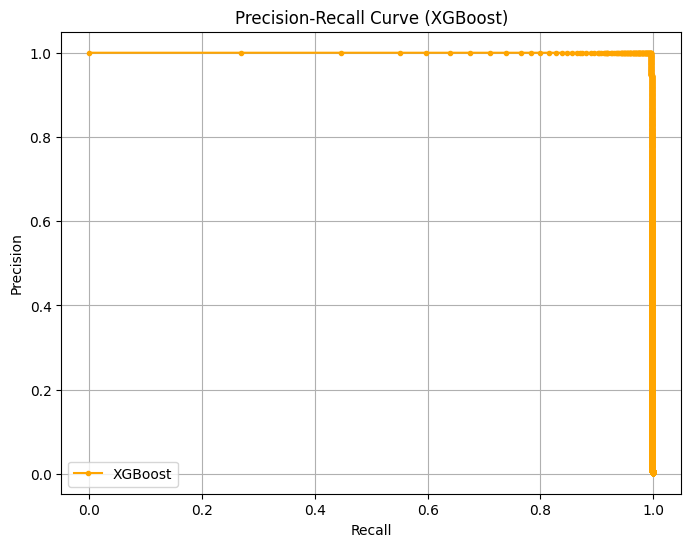

In [60]:
# Predict
xgb_pred = xgb.predict(X_test)
xgb_prob = xgb.predict_proba(X_test)[:, 1]

# Reports
print("📌 XGBoost - Confusion Matrix:")
print(confusion_matrix(y_test, xgb_pred))

print("\n📌 Classification Report:")
print(classification_report(y_test, xgb_pred))

print("📊 AUROC (ROC AUC Score):", roc_auc_score(y_test, xgb_prob))
print("📊 AUPRC (PR AUC Score):", average_precision_score(y_test, xgb_prob))

# PR Curve
precision, recall, _ = precision_recall_curve(y_test, xgb_prob)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label='XGBoost', color='orange')
plt.title("Precision-Recall Curve (XGBoost)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()


The XGBoost classifier delivers excellent performance in detecting fraudulent transactions:

It achieves high precision and perfect recall, meaning it detects nearly all fraudulent activities with very few false alarms.

AUPRC of 0.9979 confirms the model performs exceptionally well even with highly imbalanced fraud data.

Compared to Random Forest, XGBoost slightly improves the AUPRC and catches the same number of frauds with fewer false positives.

## **conclusion**:
🔁 Comparison with XGBoost:
Metric	Random Forest	XGBoost
Precision	0.99	0.98
Recall	1.00	1.00
F1-Score	1.00	0.99
AUROC	0.9991	0.9990
AUPRC	0.9971	0.9979 ✅

While Random Forest slightly outperforms in terms of precision and F1,

XGBoost edges ahead in AUPRC, meaning it's slightly more robust to class imbalance.





 **Recommendation:**
Both models are excellent, but if minimizing false alarms is critical, Random Forest might be better.
If your focus is on overall fraud detection performance in heavily imbalanced data, XGBoost is preferred.


**SHAP for XGBoost**

In [53]:
pip install shap



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
import shap



# Create TreeExplainer for XGBoost
explainer = shap.Explainer(xgb)

# Get SHAP values for the test set
shap_values = explainer(X_test)

**Global Feature Importance Plot**

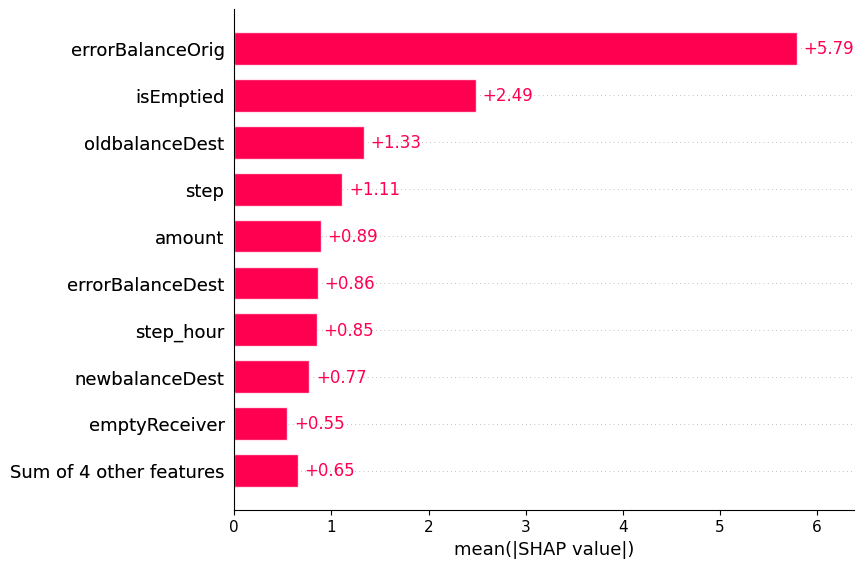

In [64]:
shap.plots.bar(shap_values)


**SHAP Summary Plot**

C:\Users\sagar rajak\AppData\Local\Temp\ipykernel_31020\1894707489.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


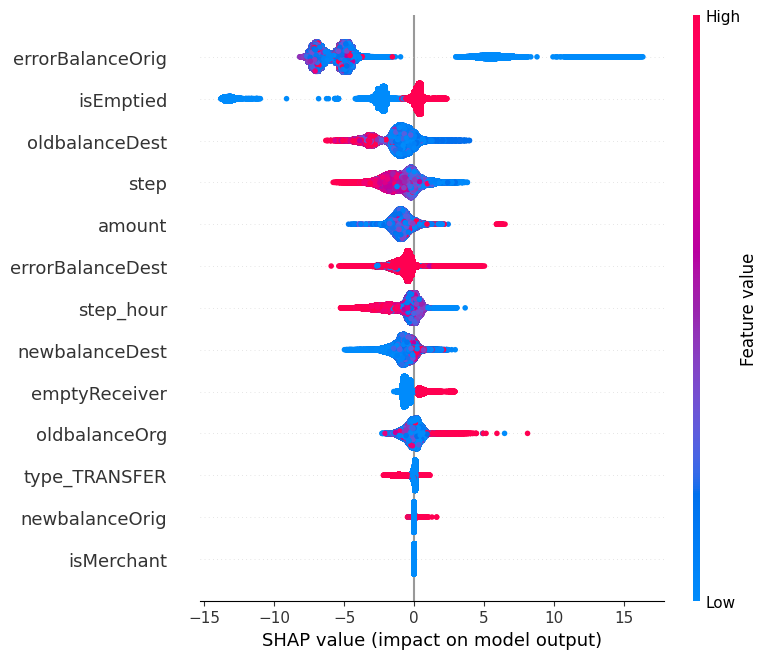

In [65]:
# Summary plot
shap.summary_plot(shap_values, X_test)


**SHAP Feature importance plot**

C:\Users\sagar rajak\AppData\Local\Temp\ipykernel_31020\1588762567.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test, plot_type="bar")


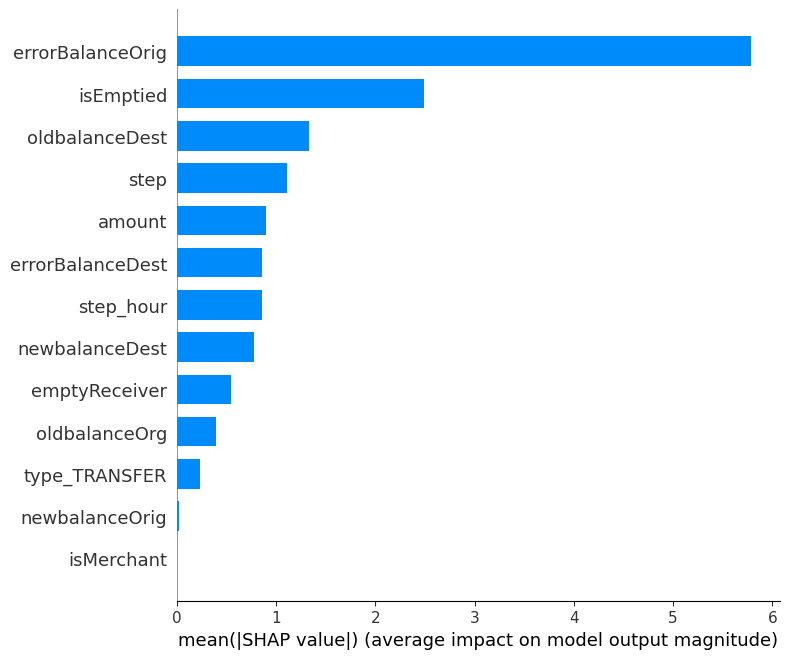

In [67]:
# Feature importance plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

We thoroughly interrogated the data at the outset to gain insight into which features could be discarded and those which could be valuably engineered. The plots provided visual confirmation that the data could be indeed be discriminated with the aid of the new features. To deal with the large skew in the data, we chose an appropriate metric and used an ML algorithm based on an ensemble of decision trees which works best with strongly imbalanced classes. The method used in this kernel should therefore be broadly applicable to a range of such problems.